# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

!wget http://cvdl.cupoy.com/file-download/part01/lena.png
img = cv2.imread('./lena.png')

--2020-02-10 18:27:18--  http://cvdl.cupoy.com/file-download/part01/lena.png
Resolving cvdl.cupoy.com (cvdl.cupoy.com)... 13.227.43.72, 13.227.43.88, 13.227.43.39, ...
Connecting to cvdl.cupoy.com (cvdl.cupoy.com)|13.227.43.72|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 719641 (703K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 702.77K  2.27MB/s    in 0.3s    

2020-02-10 18:27:19 (2.27 MB/s) - ‘lena.png’ saved [719641/719641]



## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

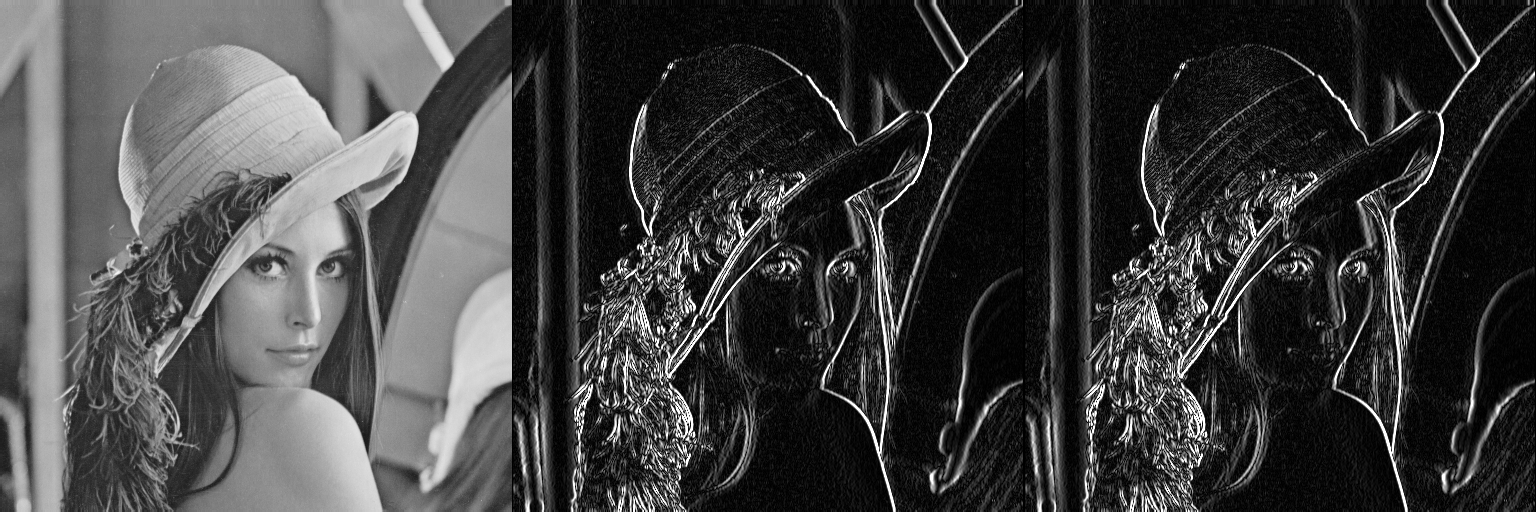

In [6]:
# 轉為灰階圖片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = np.uint8(np.absolute(img_sobel_x))

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
cv2_imshow(img_show)

# while True:
#     # 比較 Sobel 邊緣檢測的過程中針對負數操作的不同產生的差異
#     cv2.imshow('Edge Detection', img_show)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

### 比較一次與兩次計算偏微分的結果

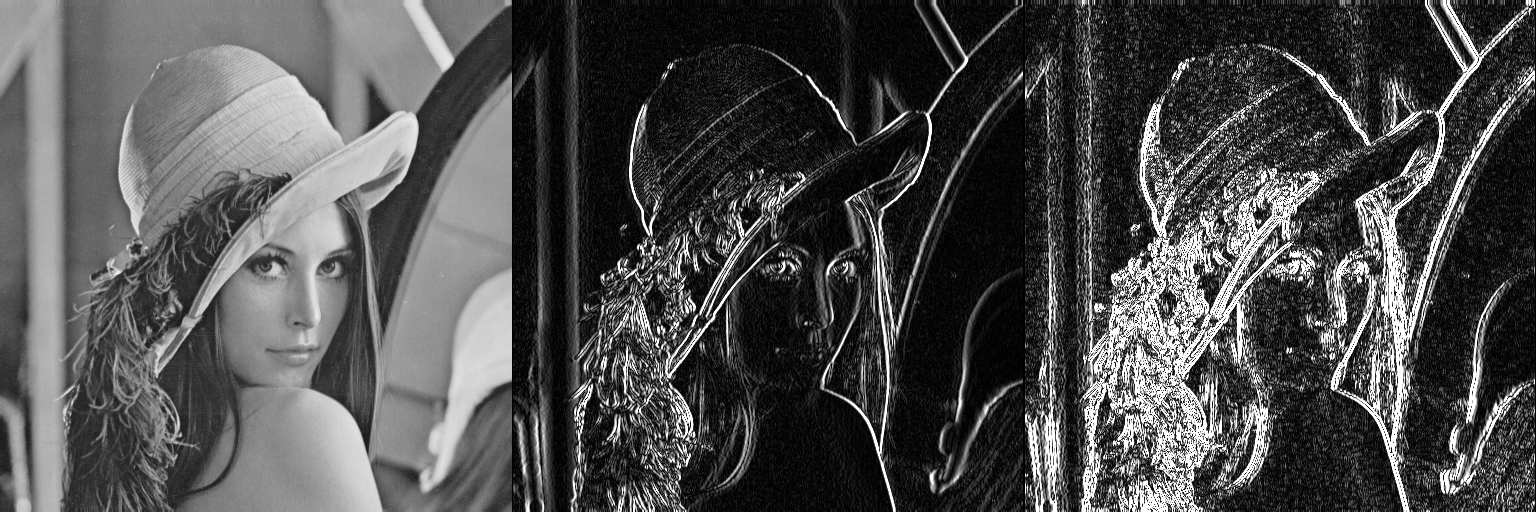

In [7]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.Sobel(img_sobel_x , cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_xx = cv2.convertScaleAbs(img_sobel_xx)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
cv2_imshow(img_show)

# while True:
#     cv2.imshow('Edge Detection', img_show)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break